# Logistic Regression with Python
Worked on the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and 
first step in machine learning!

Here, am trying to predict a classification- survival or deceased.<br/>
Let's begin our understanding of implementing Logistic Regression in Python for classification.

## 1. Import Module

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)                   #Sets the value of the specified option.
pd.pandas.set_option('display.max_rows', None)

## 2. Import data

In [2]:
df_train = pd.read_csv("C:\\Users\\kunal95\\Documents\\Implementation in ML\\Logistic Regression\\Titanic-dataset\\titanic\\train.csv")

# Print the top-5 records
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("C:\\Users\\kunal95\\Documents\\Implementation in ML\\Logistic Regression\\Titanic-dataset\\titanic\\test.csv")

# Print the top-5 records
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Print shape of train_dataset with rows and columns
df_train.shape

(891, 12)

In [5]:
# Print shape of test_dataset with rows and columns
df_test.shape

(418, 11)

**Training set has 891 rows and test set has 418 rows.<br/>
Training set have 12 features and test set have 11 features.<br/>
One extra feature in training set is Survived feature, which is the target variable.<br/>**

In [6]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop='True')

In [7]:
df_all = concat_df(df_train,df_test)
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.00,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.00,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.00,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [8]:
df_train.name = 'Training set'
df_test.name = 'Test_set'
df_all.name = 'All set'

dfs = [df_train, df_test]
print('Number of Training examples: = {}'.format(df_train.shape[0]))
print('Number of Test examples: = {}\n'.format(df_test.shape[0]))
print('Training X shape: = {}'.format(df_train.shape))
print('Training y shape: = {}'.format(df_test.shape))
print('Test X shape: = {}'.format(df_test.shape))
print('Test y shape: = {}'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training examples: = 891
Number of Test examples: = 418

Training X shape: = (891, 12)
Training y shape: = (418, 11)
Test X shape: = (418, 11)
Test y shape: = 418
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 3. Exploratory Data Analysis
**Main aim is to understand more about the data.**

## 3.1 Overview

***PassengerId is the unique id of the row and it doesn't have any effect on target<br/>
Survived is the target variable we are trying to predict (0 or 1):<br/>
1 = Survived<br/>
0 = Not Survived<br/>***

***Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3<br/> unique values (1, 2 or 3):<br/>
1 = Upper Class<br/>
2 = Middle Class<br/>
3 = Lower Class<br/>***

***Name, Sex and Age are self-explanatory<br/>
SibSp is the total number of the passengers' siblings and spouse<br/>
Parch is the total number of the passengers' parents and children<br/>
Ticket is the ticket number of the passenger<br/>
Fare is the passenger fare<br/>
Cabin is the cabin number of the passenger<br/>
Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):<br/>
C = Cherbourg<br/>
Q = Queenstown<br/>
S = Southampton<br/>***

In [9]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C


In [10]:
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
233,1125,3,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,NaN,S


### 3.2 Missing Values

In [11]:
def display_missing(df):
    for cols in df.columns.tolist():
        print('{} columns missing values :-> {}'.format(cols, df[cols].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}\n'.format(df.name))
    display_missing(df)

Training set

PassengerId columns missing values :-> 0
Survived columns missing values :-> 0
Pclass columns missing values :-> 0
Name columns missing values :-> 0
Sex columns missing values :-> 0
Age columns missing values :-> 177
SibSp columns missing values :-> 0
Parch columns missing values :-> 0
Ticket columns missing values :-> 0
Fare columns missing values :-> 0
Cabin columns missing values :-> 687
Embarked columns missing values :-> 2


Test_set

PassengerId columns missing values :-> 0
Pclass columns missing values :-> 0
Name columns missing values :-> 0
Sex columns missing values :-> 0
Age columns missing values :-> 86
SibSp columns missing values :-> 0
Parch columns missing values :-> 0
Ticket columns missing values :-> 0
Fare columns missing values :-> 1
Cabin columns missing values :-> 327
Embarked columns missing values :-> 0




In [12]:
features_with_nan=[features for features in df_train.columns if df_train[features].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,':->', np.round(df_train[feature].isnull().mean(),4), '% missing values')

Age :-> 0.1987 % missing values
Cabin :-> 0.771 % missing values
Embarked :-> 0.0022 % missing values


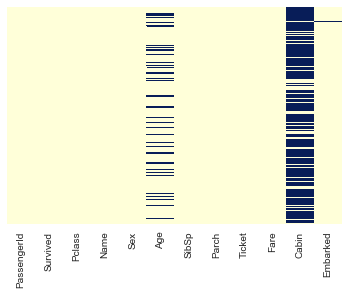

In [13]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [14]:
features_with_nan=[features for features in df_test.columns if df_test[features].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,':->', np.round(df_test[feature].isnull().mean(),4), '% missing values')

Age :-> 0.2057 % missing values
Cabin :-> 0.7823 % missing values


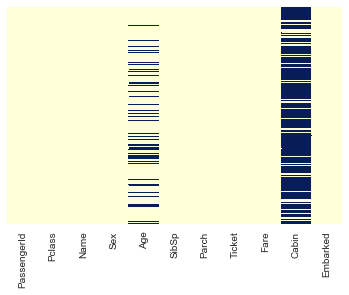

In [15]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

**As observe from above, some columns have missing values. display_missing function shows the count of missing values<br/> 
in every column in both training and test set.<br/>**

**Training set have missing values in Age, Cabin and Embarked columns.<br/>
Test set have missing values in Age, Cabin and Fare columns<br/>**

**It is convenient to work on concatenated training and test set while dealing with missing values,<br/> 
otherwise filled data may overfit to training or test set samples. The count of missing values in Age, Embarked and Fare<br/> 
are smaller compared to total sample, but roughly 80% of the Cabin is missing.<br/> 
Missing values in Age, Embarked and Fare can be filled with descriptive statistical measures but that wouldn't work for Cabin.<br/>**

Let's continue on by visualizing some more of the data!

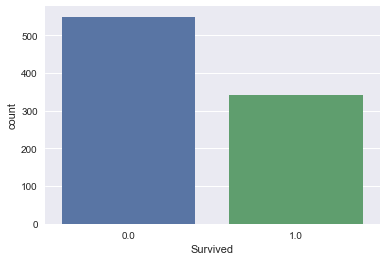

In [16]:
sns.countplot(x='Survived',data=df_all)

As we can refer from diagram, that there are around 550 people who died and around 330 who survived, which means most of them 
could not survived the Titanic accident.

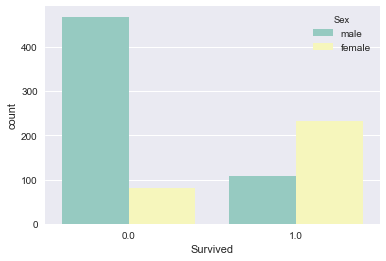

In [17]:
sns.countplot(x='Survived',hue='Sex', data=df_all, palette='Set3')

Here, am relating the Survived with sex(male,female) column to check how many m/f who have survived or not_survived,and observe 
that male ratio is more then female who did'nt survive, which means when accident happened the crew tried to save the female and child first, then actually chance given to the male.

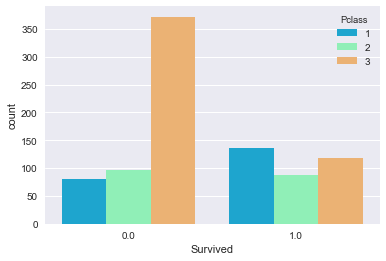

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=df_all,palette='rainbow')

Here, am checking is there any relation between survived and Pclass(ordinal data where 1 = Upper Class, 2 = Middle Class
3 = Lower Class because rich people can bribe sailor to save them first in order to survive), and after plotting got to know 
there very less number of people(upper class) died, then middle but ratio is very high for lower class who could not survived
as compare to other class.

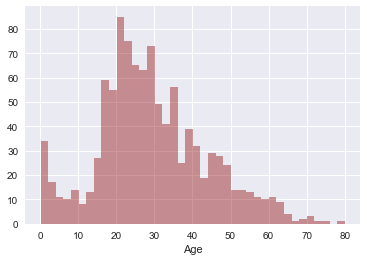

In [19]:
sns.distplot(df_all['Age'].dropna(),kde=False,color='darkred',bins=40)

From diagram, am checking whether age follows normal distribution or not. Means, what will be the average age of people who were
present in the boat. Basically distplot gives you histogram which describes the frequency between the different age group. For 
example: More ratio of people who present in ship is around 20-30yrs of age and very very less of age group around 68-80. 

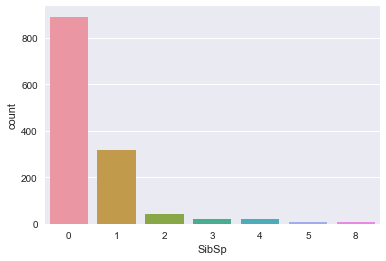

In [20]:
sns.countplot(x='SibSp',data=df_all)

From here I can refer there are many youngster on ship who did not have spouse/child, where '1' definately represent spouse,
'2' represent 1 child and 1 spouse and so on.

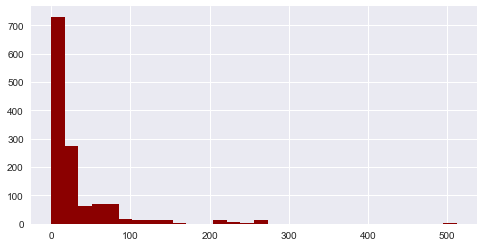

In [21]:
df_all['Fare'].hist(color='darkred',bins=30,figsize=(8,4))

Here am trying to find Fare value average to the group of people on x-axos.

In [22]:
print(df_train.shape,df_test.shape,df_all.shape)

(891, 12) (418, 11) (1309, 12)


### 3.3 Data cleaning

#### 3.3.1 Age

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the 
mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

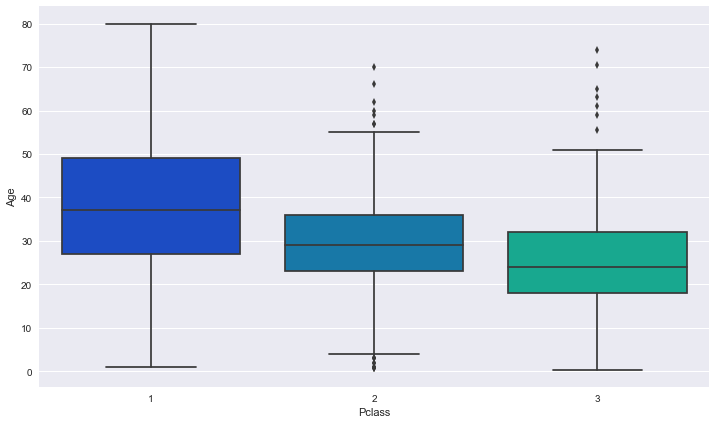

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

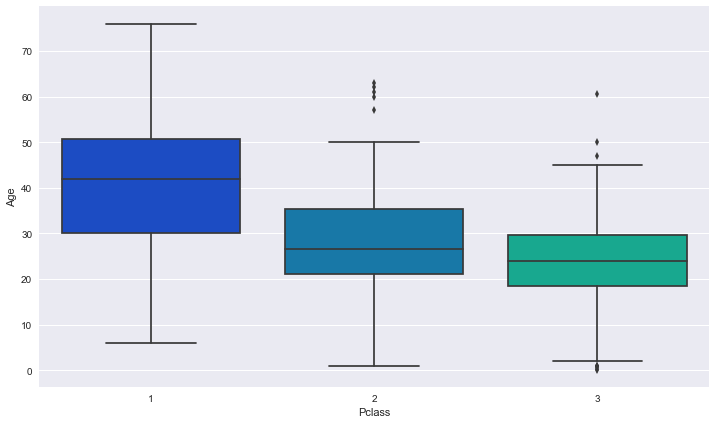

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_test,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age 
values to impute based on Pclass for Age.

In [25]:
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass ==2:
            return 26
        else:
            return 24
    else:
        return Age

Now apply that function!

In [27]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age_train,axis=1) #Apply a function along an axis of the DataFrame.

In [28]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age_test,axis=1) #Apply a function along an axis of the DataFrame.

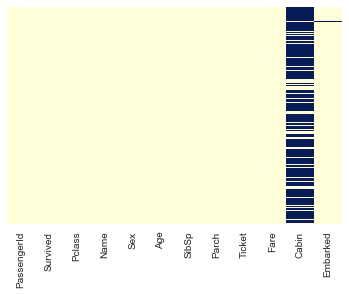

In [29]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

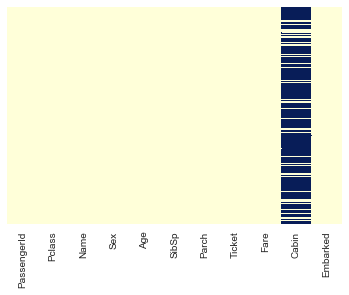

In [30]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

**As we can see here age value is getting replaced wrt the avg. value of Pclass.**

#### 3.3.2 Embarked

**Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers<br/> 
are female, upper class and they have the same ticket number. This means that they know each other and embarked from<br/> 
the same port together. The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't<br/> 
necessarily mean that they embarked from that port.**

In [31]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


** So, let just consider she embarked from S (Southampton)<br/>
Missing values in Embarked are filled with S with this information.**

In [32]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train[df_train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


**Dropping the cabin column as it posseses around 78% null values, which will not gonna help us in analysing further information.**

In [33]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
df_train.drop('Cabin',axis = 1, inplace = True)

In [35]:
df_test.drop('Cabin',axis = 1, inplace = True)

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [38]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

#### 3.3.3 Fare

**There is only one passenger with missing Fare value. We can assume that Fare is related to family size (Parch and SibSp)<br/>
and Pclass features. Median Fare value of a male with a third class ticket and no family is a logical choice to fill<br/> 
the missing value.**

In [40]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [41]:
med_fare = df_test.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0]

In [42]:
df_test['Fare'] = df_test['Fare'].fillna(med_fare)
df_test[df_test['Ticket'] == '3701']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.7958,S


In [43]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4. Feature Engineering

### 4.1 Binning Continuous Features

### 4.1.1 Fare

**Fare feature is positively skewed and survival rate is extremely high on the right end.<br/>
13 quantile based bins are used for Fare feature. Even though the bins are too much, they provide decent<br/> 
amount of information gain. The groups at the left side of the graph has the lowest survival rate and the<br/> 
groups at the right side of the graph has the highest survival rate. This high survival rate was not visible<br/> 
in the distribution graph. There is also an unusual group (15.85, 24] in the middle with high survival rate<br/> 
that is captured in this process.**

In [44]:
dtrain=df_train.copy()
dtest=df_test.copy()

In [45]:
# “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data 
# into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, 
# not the actual numeric edges of the bins.

dtrain['Fare'] = pd.qcut(dtrain['Fare'], 13)

In [46]:
dtrain['Fare']

0          (7.229, 7.75]
1         (55.9, 83.158]
2          (7.896, 8.05]
3         (33.308, 55.9]
4          (7.896, 8.05]
5           (8.05, 10.5]
6         (33.308, 55.9]
7          (15.85, 24.0]
8           (10.5, 13.0]
9        (26.55, 33.308]
10         (15.85, 24.0]
11         (24.0, 26.55]
12         (7.896, 8.05]
13       (26.55, 33.308]
14         (7.75, 7.896]
15         (15.85, 24.0]
16       (26.55, 33.308]
17          (10.5, 13.0]
18         (15.85, 24.0]
19       (-0.001, 7.229]
20         (24.0, 26.55]
21          (10.5, 13.0]
22         (7.896, 8.05]
23        (33.308, 55.9]
24         (15.85, 24.0]
25       (26.55, 33.308]
26       (-0.001, 7.229]
27     (83.158, 512.329]
28         (7.75, 7.896]
29         (7.75, 7.896]
30       (26.55, 33.308]
31     (83.158, 512.329]
32         (7.229, 7.75]
33          (8.05, 10.5]
34        (55.9, 83.158]
35        (33.308, 55.9]
36       (-0.001, 7.229]
37         (7.896, 8.05]
38         (15.85, 24.0]
39          (10.5, 13.0]


In [47]:
dtest['Fare'] = pd.qcut(dtest['Fare'], 13)

In [48]:
dtest['Fare']

0           (7.75, 7.86]
1         (-0.001, 7.25]
2           (8.05, 10.5]
3           (8.05, 10.5]
4           (10.5, 13.0]
5           (8.05, 10.5]
6           (7.25, 7.75]
7        (26.55, 36.202]
8         (-0.001, 7.25]
9        (22.525, 26.55]
10          (7.86, 8.05]
11       (22.525, 26.55]
12        (59.4, 93.231]
13       (22.525, 26.55]
14        (59.4, 93.231]
15       (26.55, 36.202]
16          (10.5, 13.0]
17        (-0.001, 7.25]
18          (7.86, 8.05]
19        (-0.001, 7.25]
20        (36.202, 59.4]
21        (-0.001, 7.25]
22       (26.55, 36.202]
23        (59.4, 93.231]
24     (93.231, 512.329]
25          (13.0, 15.5]
26        (59.4, 93.231]
27        (-0.001, 7.25]
28       (26.55, 36.202]
29        (15.5, 22.525]
30       (22.525, 26.55]
31       (26.55, 36.202]
32        (15.5, 22.525]
33       (22.525, 26.55]
34        (36.202, 59.4]
35        (-0.001, 7.25]
36          (7.86, 8.05]
37          (8.05, 10.5]
38          (8.05, 10.5]
39        (36.202, 59.4]


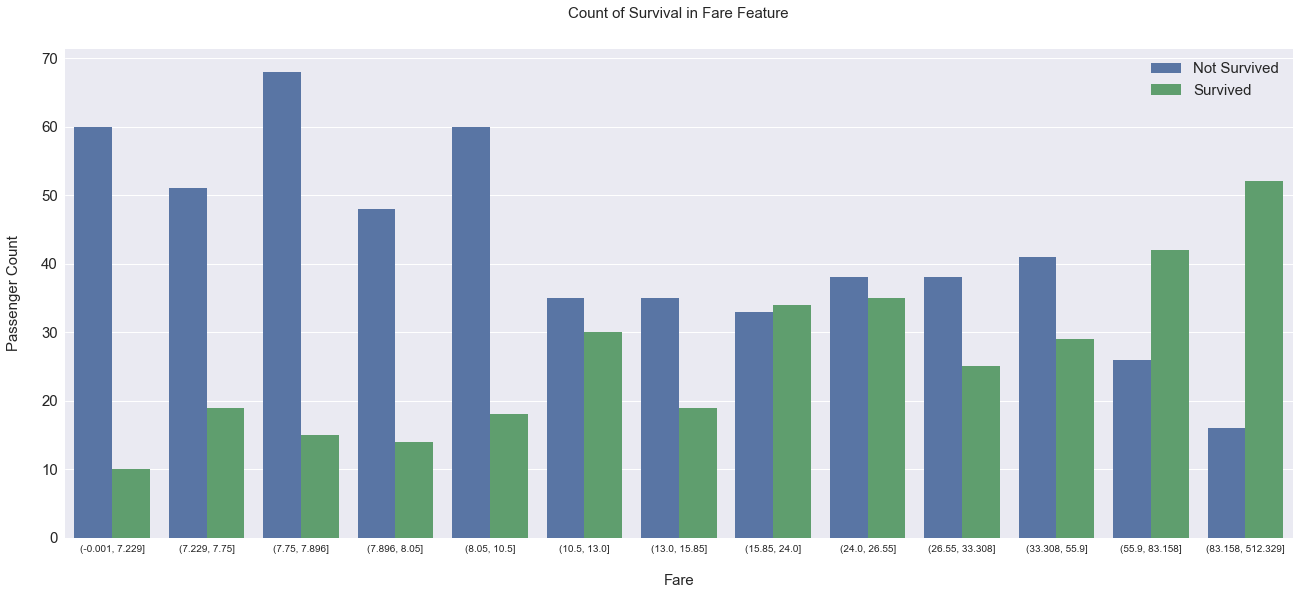

In [49]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=dtrain)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

### 4.1.2 Age

**Age feature has a normal distribution with some spikes and bumps and 10 quantile based bins are used for Age.<br/> 
  The third bin has the highest survival rate and fourth bin has the lowest survival rate. Those were the biggest<br/> 
  spikes in the distribution.**

In [50]:
dtrain['Age'] = pd.qcut(dtrain['Age'], 10, duplicates='drop')

In [51]:
dtest['Age'] = pd.qcut(dtest['Age'], 10, duplicates='drop')

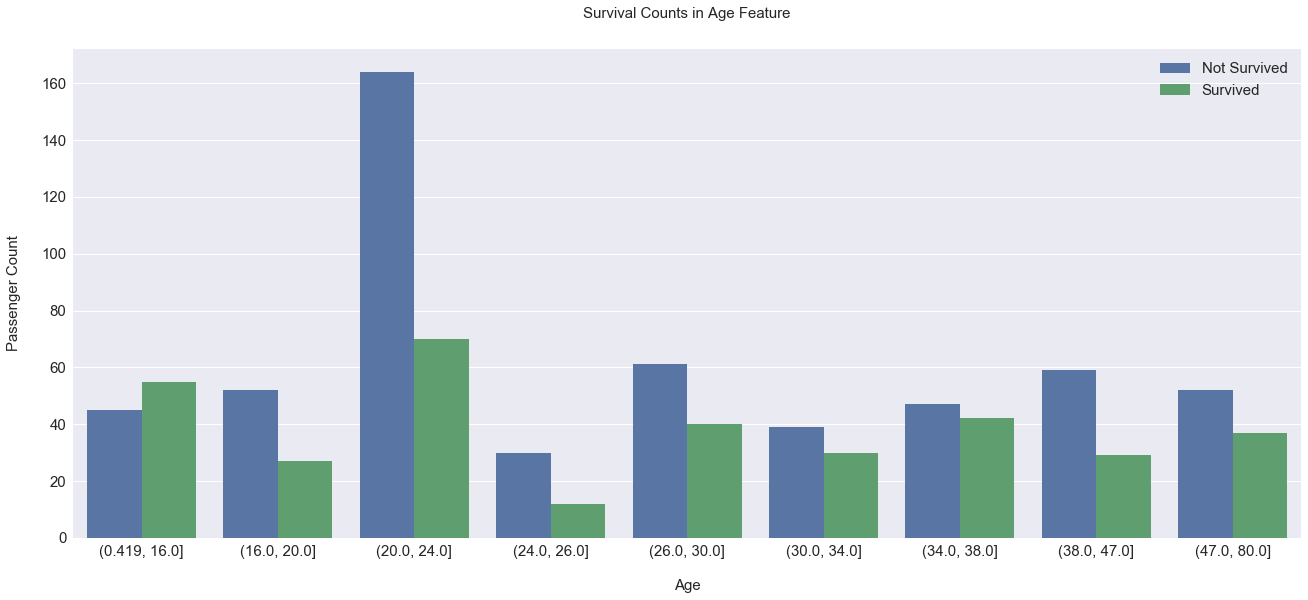

In [52]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=dtrain)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

### 4.2 Frequency Encoding
**Family_Size is created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count<br/>
  of parents and children. Those columns are added in order to find the total size of families.<br/> 
  Adding 1 at the end, is the current passenger. Graphs have clearly shown that family size is a predictor of survival<br/>
  because different values have different survival rates.**<br/>

**Family Size with 1 are labeled as Alone<br/>
Family Size with 2, 3 and 4 are labeled as Small<br/>
Family Size with 5 and 6 are labeled as Medium<br/>
Family Size with 7, 8 and 11 are labeled as Large**

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


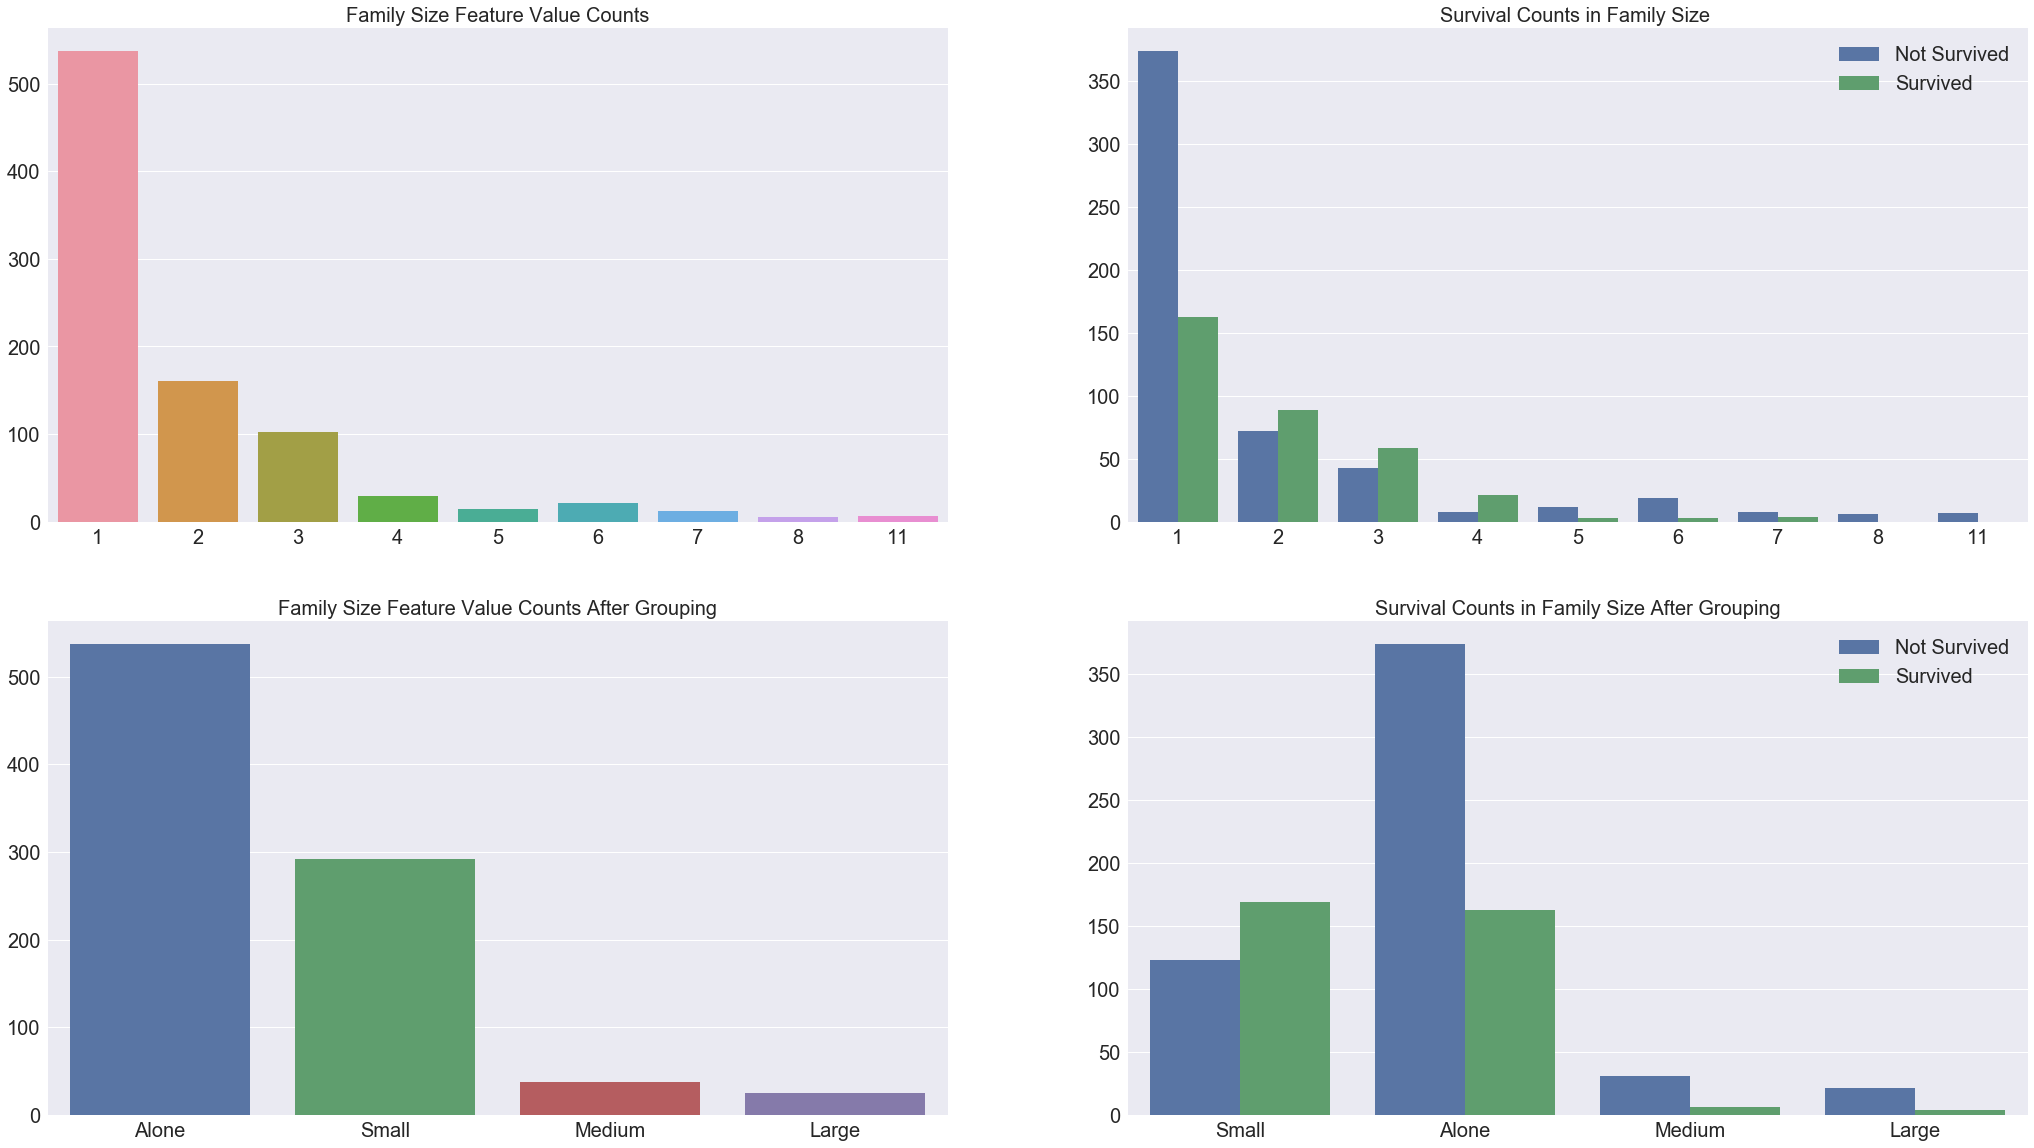

In [55]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_train['Family_Size'].value_counts().index, y=df_train['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_train, ax=axs[0][1])

#Dispalying header for graphs on axis ([00],[01])
axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1)

#Creating new column 'Family_Size_Grouped'
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)
df_test['Family_Size_Grouped'] = df_test['Family_Size'].map(family_map)

sns.barplot(x=df_train['Family_Size_Grouped'].value_counts().index, y=df_train['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_train, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_Size_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone


In [57]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_Size_Grouped
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,Small


** There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier.**<br/>

** How is this feature different than Family_Size? Many passengers travelled along with groups. 
   Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.**<br/>

** Why not grouping tickets by their prefixes? If prefixes in Ticket feature has any meaning, then they are already 
   captured in Pclass or Embarked features because that could be the only logical information which can be derived 
   from the Ticket feature.**<br/>

**According to the graph below, groups with 2,3 and 4 members had a higher survival rate. Passengers who travel alone
  has the lowest survival rate. After 4 group members, survival rate decreases drastically. This pattern is very similar 
  to Family_Size feature but there are minor differences. Ticket_Frequency values are not grouped like Family_Size because
  that would basically create the same feature with perfect correlation. This kind of feature wouldn't provide 
  any additional information gain.**

In [58]:
df_train['Ticket_Frequency'] = df_train.groupby('Ticket')['Ticket'].transform('count')
df_test['Ticket_Frequency'] = df_test.groupby('Ticket')['Ticket'].transform('count')

Text(0.5,1.05,'Count of Survival in Ticket Frequency Feature')

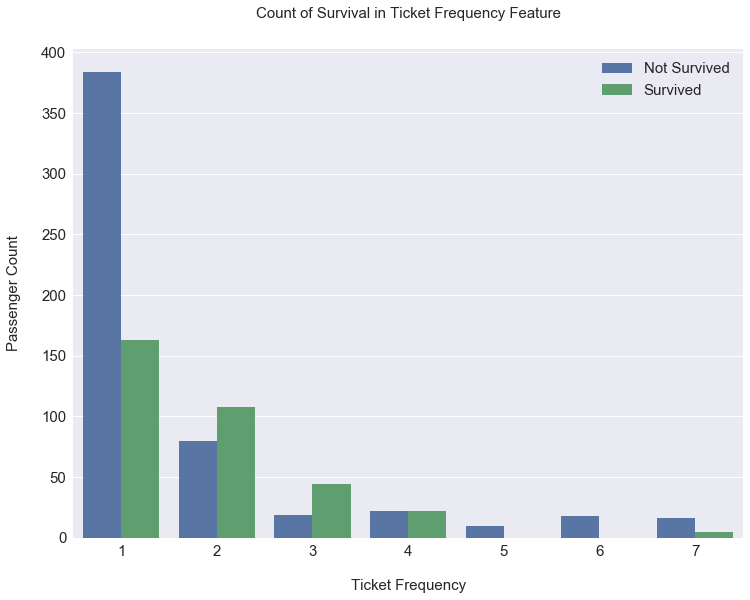

In [59]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_train)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

In [60]:
df_train['Title']=df_train['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
df_test['Title']=df_test['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

In [61]:
df_train['Is_Married'] = 0
df_train['Is_Married'].loc[df_train['Title'] == 'Mrs'] = 1

In [62]:
df_test['Is_Married'] = 0
df_test['Is_Married'].loc[df_test['Title'] == 'Mrs'] = 1

In [63]:
df_train['Title']

0                Mr
1               Mrs
2              Miss
3               Mrs
4                Mr
5                Mr
6                Mr
7            Master
8               Mrs
9               Mrs
10             Miss
11             Miss
12               Mr
13               Mr
14             Miss
15              Mrs
16           Master
17               Mr
18              Mrs
19              Mrs
20               Mr
21               Mr
22             Miss
23               Mr
24             Miss
25              Mrs
26               Mr
27               Mr
28             Miss
29               Mr
30              Don
31              Mrs
32             Miss
33               Mr
34               Mr
35               Mr
36               Mr
37               Mr
38             Miss
39             Miss
40              Mrs
41              Mrs
42               Mr
43             Miss
44             Miss
45               Mr
46               Mr
47             Miss
48               Mr
49              Mrs


In [64]:
df_train['Is_Married']

0      0
1      1
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     0
23     0
24     0
25     1
26     0
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     1
50     0
51     0
52     1
53     1
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     1
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

Text(0.5,1.05,'Title Feature Value Counts After Grouping')

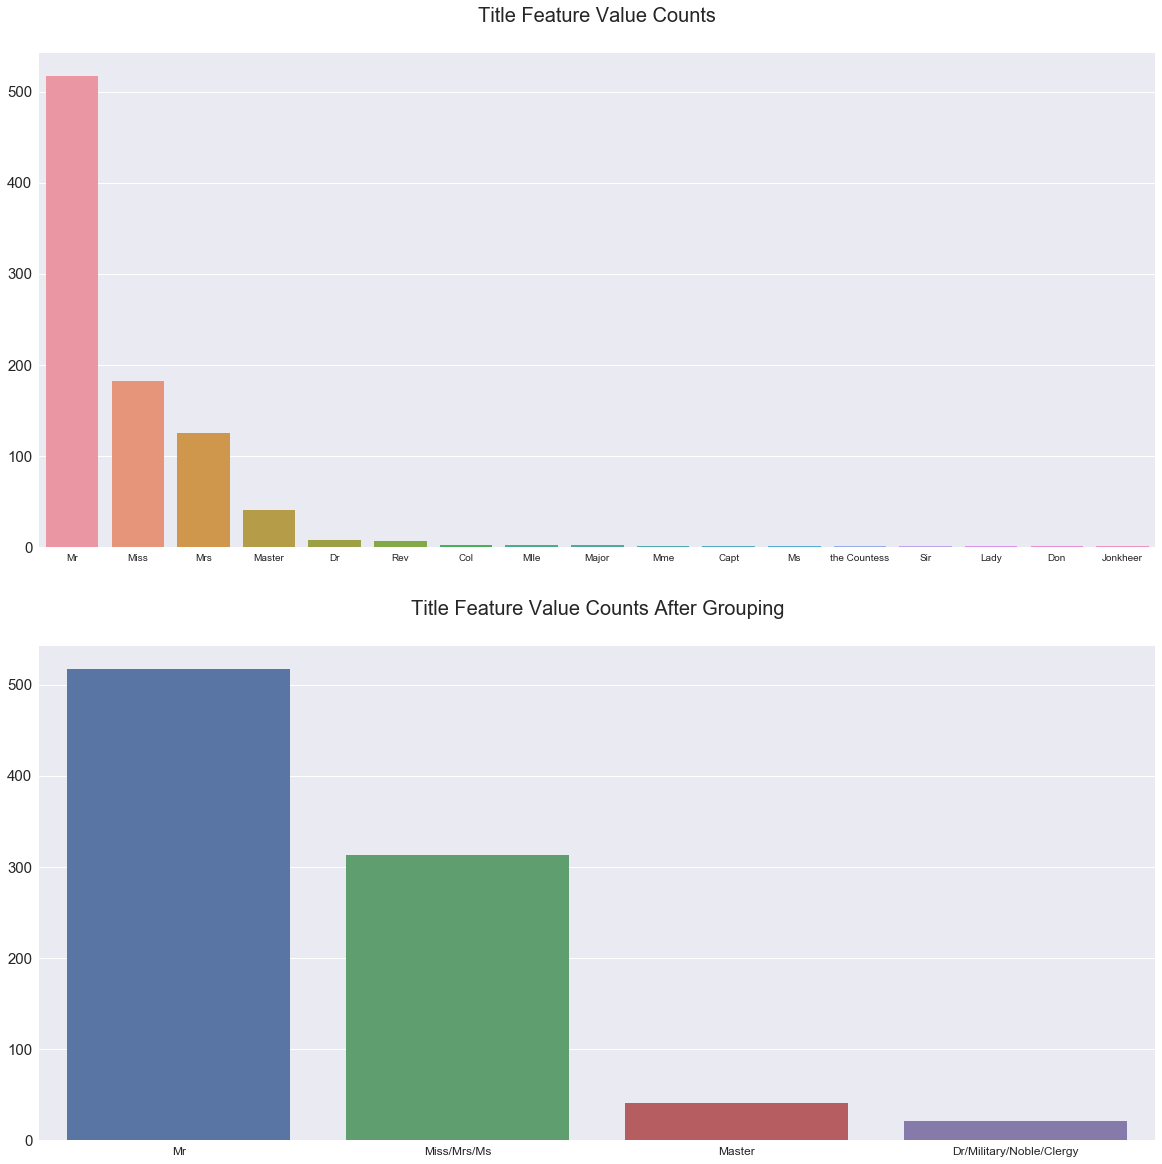

In [65]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_train['Title'].value_counts().index, y=df_train['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=12)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)
    
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_train['Title'] = df_train['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_train['Title'] = df_train['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

df_test['Title'] = df_test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_test['Title'] = df_test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_train['Title'].value_counts().index, y=df_train['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

In [66]:
df_train.shape

(891, 16)

In [67]:
df_test.shape

(418, 15)

In [68]:
df_train.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Embarked                object
Family_Size              int64
Family_Size_Grouped     object
Ticket_Frequency         int64
Title                   object
Is_Married               int64
dtype: object

In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small,1,Miss/Mrs/Ms,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone,1,Miss/Mrs/Ms,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small,2,Miss/Mrs/Ms,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone,1,Mr,0


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be 
able to directly take in those features as inputs.

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Embarked             891 non-null    object 
 11  Family_Size          891 non-null    int64  
 12  Family_Size_Grouped  891 non-null    object 
 13  Ticket_Frequency     891 non-null    int64  
 14  Title                891 non-null    object 
 15  Is_Married           891 non-null    int

In [71]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
fsg = pd.get_dummies(df_train['Family_Size_Grouped'],drop_first=True)
title = pd.get_dummies(df_train['Title'],drop_first=True)

In [72]:
df_train.drop(['Sex','Embarked','Family_Size_Grouped','Title','Name','Ticket'],axis=1,inplace=True)

In [73]:
sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'],drop_first=True)
fsg_test = pd.get_dummies(df_test['Family_Size_Grouped'],drop_first=True)
title_test = pd.get_dummies(df_test['Title'],drop_first=True)

In [74]:
df_test.drop(['Sex','Embarked','Family_Size_Grouped','Title','Name','Ticket'],axis=1,inplace=True)

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Ticket_Frequency,Is_Married
0,1,0,3,22.0,1,0,7.2500,2,1,0
1,2,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,3,26.0,0,0,7.9250,1,1,0
3,4,1,1,35.0,1,0,53.1000,2,2,1
4,5,0,3,35.0,0,0,8.0500,1,1,0


In [76]:
df_train=pd.concat([df_train,sex,embark,fsg,title],axis=1)
df_test=pd.concat([df_test,sex_test,embark_test,fsg_test,title_test],axis=1)

In [77]:
df_train.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Family_Size           int64
Ticket_Frequency      int64
Is_Married            int64
male                  uint8
Q                     uint8
S                     uint8
Large                 uint8
Medium                uint8
Small                 uint8
Master                uint8
Miss/Mrs/Ms           uint8
Mr                    uint8
dtype: object

In [78]:
df_test.dtypes

PassengerId           int64
Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Family_Size           int64
Ticket_Frequency      int64
Is_Married            int64
male                  uint8
Q                     uint8
S                     uint8
Large                 uint8
Medium                uint8
Small                 uint8
Master                uint8
Miss/Mrs/Ms           uint8
Mr                    uint8
dtype: object

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Ticket_Frequency,Is_Married,male,Q,S,Large,Medium,Small,Master,Miss/Mrs/Ms,Mr
0,1,0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,1,0,0,0,0,0,1,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,2,2,1,0,0,1,0,0,1,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,0,0,0,0,1


In [80]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Ticket_Frequency,Is_Married,male,Q,S,Large,Medium,Small,Master,Miss/Mrs/Ms,Mr
0,892,3,34.5,0,0,7.8292,1,1,0,1,1,0,0,0,0,0,0,1
1,893,3,47.0,1,0,7.0000,2,1,1,0,0,1,0,0,1,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,1,1,0,0,0,0,0,0,1
3,895,3,27.0,0,0,8.6625,1,1,0,1,0,1,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,3,1,1,0,0,1,0,0,1,0,1,0


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [81]:
df_train.shape

(891, 19)

In [82]:
df_train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Family_Size         0
Ticket_Frequency    0
Is_Married          0
male                0
Q                   0
S                   0
Large               0
Medium              0
Small               0
Master              0
Miss/Mrs/Ms         0
Mr                  0
dtype: int64

In [83]:
df_test.shape

(418, 18)

In [84]:
df_test.isnull().sum()

PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Family_Size         0
Ticket_Frequency    0
Is_Married          0
male                0
Q                   0
S                   0
Large               0
Medium              0
Small               0
Master              0
Miss/Mrs/Ms         0
Mr                  0
dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X =df_train.loc[:,df_train.columns!="Survived"] # loc is used for names of the columns.iloc is used for row or column index
y =df_train.loc[:,"Survived"]

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20, random_state = 123)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 18)
(179, 18)
(712,)
(179,)


## Training and Predicting

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predictions = logmodel.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[104,  10],
       [ 14,  51]], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8659217877094972

In [95]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

## Evaluation

We can check precision, recall, f1-score using classification report!

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       114
           1       0.84      0.78      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179



#### Prediction on Unseen data

In [98]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Ticket_Frequency,Is_Married,male,Q,S,Large,Medium,Small,Master,Miss/Mrs/Ms,Mr
0,892,3,34.5,0,0,7.8292,1,1,0,1,1,0,0,0,0,0,0,1
1,893,3,47.0,1,0,7.0000,2,1,1,0,0,1,0,0,1,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,1,1,0,0,0,0,0,0,1
3,895,3,27.0,0,0,8.6625,1,1,0,1,0,1,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,3,1,1,0,0,1,0,0,1,0,1,0


In [99]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Ticket_Frequency,Is_Married,male,Q,S,Large,Medium,Small,Master,Miss/Mrs/Ms,Mr
172,173,3,1.0,1,1,11.1333,3,3,0,0,0,1,0,0,1,0,1,0
524,525,3,24.0,0,0,7.2292,1,1,0,1,0,0,0,0,0,0,0,1
452,453,1,30.0,0,0,27.7500,1,1,0,1,0,0,0,0,0,0,0,1
170,171,1,61.0,0,0,33.5000,1,1,0,1,0,1,0,0,0,0,0,1
620,621,3,27.0,1,0,14.4542,2,2,0,1,0,0,0,0,1,0,0,1


In [100]:
predictions_test = logmodel.predict(df_test)

In [101]:
predictions_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
#data=pd.read_csv('C:/Users/kunal95/Documents/Implementation in ML/Logistic Regression/Titanic-dataset/titanic/gender_submission.csv')
#data.shape

In [103]:
#survived_submission = pd.DataFrame()
#sub_file = pd.read_csv('C:/Users/kunal95/Documents/Implementation in ML/Logistic Regression/Titanic-dataset/titanic/gender_submission.csv')
#survived_submission['PassengerId'] = sub_file['PassengerId']
#survived_submission['Survived'] = predictions_test
##survived_submission[['PassengerId','Survived']].to_csv('Logistic_Submission.csv',index=False)

In [ ]:
#survived_submission

# Build Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
predictions_dt = clf.predict(X_test)

In [107]:
predictions_dt

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [108]:
CM_DT = confusion_matrix(y_test,predictions_dt)
CM_DT

array([[86, 28],
       [19, 46]], dtype=int64)

In [109]:
Accuracy_DT = accuracy_score(y_test,predictions_dt)
Accuracy_DT

0.7374301675977654

# Build XGBoost Model

In [110]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [111]:
#Initialize an instance of the XGBRegressor class
#regressor = xgb.XGBRegressor(
#    n_estimators=100,
#    reg_lambda=1,
#    gamma=0,
#    max_depth=3,
#    objective='binary:logistic'
#)

In [112]:
regressor = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,                       #Minimum loss reduction required to make a further partition on a leaf node of the tree
    max_depth=3,                   #Maximum tree depth for base learners.
    objective='binary:logistic'    #Specify the learning task and the corresponding learning objective
)

In [113]:
regressor.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
predictions_xgboost = regressor.predict(X_test)
predictions_xgboost

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [115]:
predictions_xgboost

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [116]:
CM_XGB = confusion_matrix(y_test,predictions_xgboost)
CM_XGB

array([[99, 15],
       [14, 51]], dtype=int64)

In [117]:
Accuracy_XGB = accuracy_score(y_test,predictions_xgboost)
Accuracy_XGB

0.8379888268156425

In [118]:
predictions_unseen_xgboost = regressor.predict(df_test)
predictions_unseen_xgboost

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [132]:
#xgboost_submission = pd.DataFrame()
#sub_file = pd.read_csv('C:/Users/kunal95/Documents/Implementation in ML/Logistic Regression/Titanic-dataset/titanic/submission_log.csv')
#xgboost_submission['PassengerId'] = sub_file['PassengerId']
#xgboost_submission['Survived'] = predictions_unseen_xgboost
#xgboost_submission[['PassengerId','Survived']].to_csv('Submission.csv',index=False)

# Build Knn Model

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
prediction_knn = knnclassifier.predict(X_test)

In [123]:
prediction_knn

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [124]:
CM_XGB = confusion_matrix(y_test,prediction_knn)
CM_XGB

array([[89, 25],
       [37, 28]], dtype=int64)

In [125]:
Accuracy_knn = accuracy_score(y_test,prediction_knn)
Accuracy_knn

0.6536312849162011

In [126]:
predictions_unseen_knn = knnclassifier.predict(df_test)
predictions_unseen_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Cross_Validation

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
print(cross_val_score(logmodel, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

0.8148284149340487


In [129]:
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

0.7570539906103286


In [130]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
print(cross_val_score(GNB, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

0.811932148446233


In [131]:
print(cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

0.8315146434160517


**Conclusion: With Xgboost able to get accuracy of 77.990 in kaggle, while with logistic around 75.662.**

Some more things needs to be done in feature engineering:

* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?